In [1]:
import numpy as np
from scipy.sparse import csr_matrix,csc_matrix,save_npz,load_npz,coo_matrix, vstack
import sys
from tqdm import tqdm
import h5py
import os
import matplotlib.pyplot as plt

# Test Datasets

In [2]:
HDDFolder = '/home/invites/jmorlot/HDD/'
data_path = HDDFolder + '/Datasets/ATAC_Hemato_Corces/ATAC_Hemato_Raw/'
f = h5py.File(data_path+'matrix_hematoC.hdf5','r')
matrix = np.array(f[f.keys()[0]])
f.close()
namesCT = np.load(data_path+'names_CT2.npy')
labels = np.load(data_path+'labels_CT2.npy')

In [3]:
idx1 = np.where(matrix.sum(axis=0)>0)[0]
matrix = matrix[:,idx1]

In [4]:
idx = np.where(labels<13)[0]
matrix = matrix[idx]
labels = labels[idx]
namesCT = namesCT[np.unique(labels)]

In [5]:
idx = np.argsort(labels)
matrix = matrix[idx,:]
labels = labels[idx]

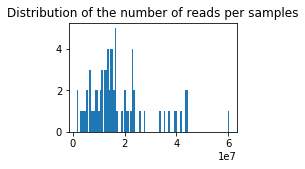

In [6]:
plt.figure(figsize=(3,2))
plt.hist(matrix.sum(axis=1),100)
plt.title('Distribution of the number of reads per samples')
#plt.savefig('histogram.png',dpi=300)
plt.show()

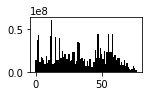

In [7]:
plt.figure(figsize=(2,1))
plt.bar(np.arange(matrix.shape[0]),matrix.sum(axis=1),1,color='k')
#plt.savefig('plot_sum.png',dpi=300)
plt.show()

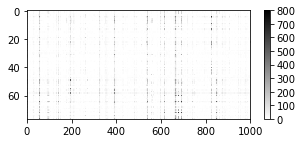

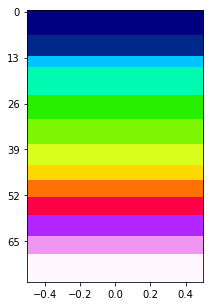

In [8]:
plt.figure(figsize=(5,2))
plt.imshow(matrix[idx,1100:2100],aspect='auto',cmap='gray_r')
plt.colorbar()
plt.savefig('ATAC_matrix_largeCont.png',dpi=300)
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(labels[:,None],aspect=0.02,cmap='gist_ncar')
plt.yticks(np.arange(0,matrix.shape[0]+1,labels.max()+1))
plt.savefig('ATAC_colorbarCont.png',dpi=300)
plt.show()


# NGS Quality Tester

In [131]:
sys.path.append('../')
import QualityTester as QT
import QualityMesures as QM
reload(QT)

<module 'QualityTester' from '../QualityTester.pyc'>

In [132]:
reload(QT)
reload(QM)
qt2 = QT.QualityTester()
qt2.__dict__ = qt.__dict__ 
qt = QT.QualityTester()
qt.__dict__  = qt2.__dict__

In [ ]:
qt = QT.QualityTester()

Remove outliers defined by anomalous number of reads


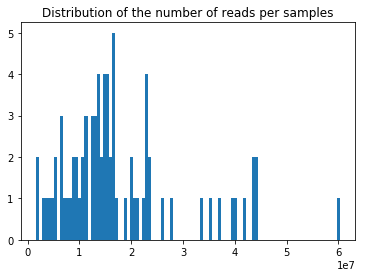

Lower threshold = 1575615
Upper threshold = 44107879
Number of removed samples = 2 / 77

Testing all distances:

None
	City Block
	Cosine
	Euclidean
	L2
	Bray Curtis
	Canberra
	Pearson
	Squared Euclidean
	Mutual Information
	Chebyshev
	Spearman

PCA
	City Block
	Cosine
	Euclidean
	L2
	Bray Curtis
	Canberra
	Pearson
	Squared Euclidean
	Mutual Information
	Chebyshev
	Spearman
Get optimal PCA-Distance-Kernel
Optimal (PCA,Distance,Kernel) = ('None', 'Cosine', 'None')


In [98]:
qt.get_optimal_distance(matrix=matrix,labels=labels,
                        threshold = [0.01, 0.99])

In [75]:
qt.Distmat['PCA-Mutual Information-None'] = QT.MI(qt.PCA['PCA']())

100%|██████████| 75/75 [00:03<00:00, 19.16it/s]


In [76]:
qt.Distmat['None-Mutual Information-None'] = QT.MI(qt.matrix)

100%|██████████| 75/75 [2:52:34<00:00, 138.05s/it]  


In [77]:
qt.clust_index_filt_threshold={Ikey:{} for Ikey in qt.AllInternIndex.keys()}
for Tkey in qt.Distmat.keys():
    print Tkey
    for Ikey in qt.AllInternIndex.keys():
        #Compute the clustering index score
        print '\t' + Ikey
        try:
            qt.Res[Ikey][Tkey] = qt.AllInternIndex[Ikey](qt.Distmat[Tkey],qt.labels)
            qt.clust_index_filt_evol[Ikey][Tkey],qt.clust_index_filt_score[Ikey][Tkey],qt.clust_index_filt_threshold[Ikey][Tkey] = qt.ClustIndexFilt(qt.Distmat[Tkey],qt.labels,Ikey)            
            print qt.clust_index_filt_score[Ikey][Tkey],qt.clust_index_filt_threshold[Ikey][Tkey]
        except Exception as e:
            print(e)
            continue

None-City Block-None
	Connectivity
0.718559785713 34
	Silhouette
0.585859399399 34
	log10CalinskiHarabaz
1.04934011774 35
None-Spearman-None
	Connectivity
0.753903133903 12
	Silhouette
0.56511783517 12
	log10CalinskiHarabaz
0.761482696784 13
None-L2-None
	Connectivity
0.738437690992 37
	Silhouette
0.610238101201 35
	log10CalinskiHarabaz
1.18054714803 35
PCA-Cosine-None
	Connectivity
0.729839935679 34
	Silhouette
0.698419112991 34
	log10CalinskiHarabaz
1.29768710186 34
PCA-L2-None
	Connectivity
0.73971224234 35
	Silhouette
0.615359433134 35
	log10CalinskiHarabaz
1.17748232349 35
None-Chebyshev-None
	Connectivity
0.710569079474 34
	Silhouette
0.619810489187 34
	log10CalinskiHarabaz
1.14087846528 34
PCA-Canberra-None
	Connectivity
0.480442055917 41
	Silhouette
0.526606170953 40
	log10CalinskiHarabaz
0.490312079184 42
PCA-Spearman-None
	Connectivity
0.595873620837 30
	Silhouette
0.573905497985 30
	log10CalinskiHarabaz
0.662037002513 31
PCA-Bray Curtis-None
	Connectivity
0.735412508551 22
	

In [87]:
for Ikey in qt.Res.keys():
    qt.SortedPDKkey[Ikey] = qt.PDKkeys[np.argsort(qt.PDKrank[Ikey])]

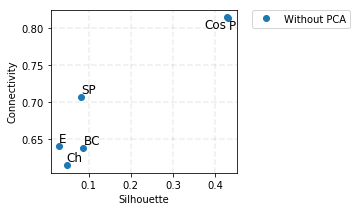

In [133]:
qt.displayNamesScatter(Suffix='_ATACCont',ImgSize=3,numdisplay=6,dispNoPCA=True,dispPCA=False)

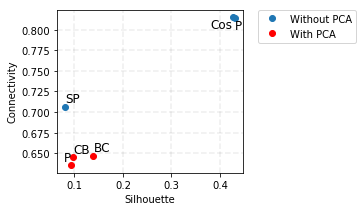

In [134]:
qt.displayNamesScatter(Suffix='_ATACCont_PCA',ImgSize=3,numdisplay=6,dispNoPCA=True,dispPCA=True)

In [121]:
qt.SortedPDKkey['Silhouette'] = np.array([key for key in qt.SortedPDKkey['Silhouette'] if key not in ['None-Hamming-None','PCA-Hamming-None']])

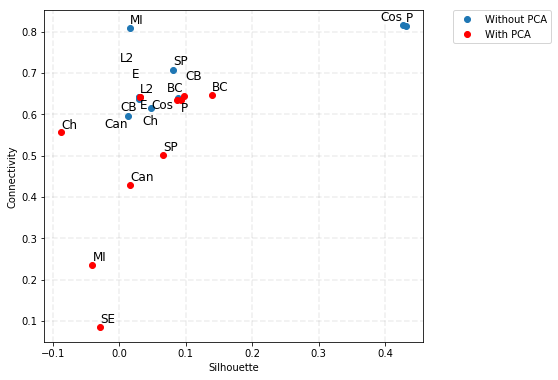

In [122]:
qt.displayNamesScatter(Suffix='_ATACCont_PCA_all',ImgSize=6.1,numdisplay=100,dispNoPCA=True,dispPCA=True)

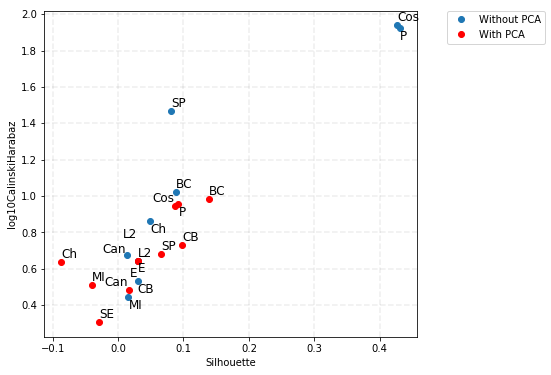

In [123]:
qt.displayNamesScatter(Suffix='_ATACCont_withCal_PCA',ImgSize=6,numdisplay=100,dispNoPCA=True,dispPCA=True,IkeyY='log10CalinskiHarabaz')

In [103]:
qt.WriteDistanceScore(Suffix='_ATACCont')

In [104]:
idx = np.argsort(qt.clust_index_filt_score['Silhouette'].values())[::-1]
keys = np.array(qt.clust_index_filt_score['Silhouette'].keys())[idx]
f = file('Filt_index_ATACCont.txt','w')
f.write('\t'.join(['Distance','Filtered Clustering Index','Number profiles removed at Zscore Silhouette 1.65'])+'\n')
for key in keys:
    if key not in ['None-Chebyshev-None','PCA-Hamming-None']:
        print key,qt.clust_index_filt_score['Silhouette'][key],qt.clust_index_filt_threshold['Silhouette'][key]
        f.write('\t'.join([key,str(qt.clust_index_filt_score['Silhouette'][key]),str(qt.clust_index_filt_threshold['Silhouette'][key])])+'\n')
f.close()

None-Pearson-None 0.806160958182 10
None-Cosine-None 0.805427625077 10
PCA-Pearson-None 0.700918436521 34
PCA-Cosine-None 0.698419112991 34
PCA-Bray Curtis-None 0.643765518724 18
None-Euclidean-None 0.618343763078 35
PCA-Euclidean-None 0.615775428657 34
PCA-City Block-None 0.61567658953 22
PCA-L2-None 0.615359433134 35
None-L2-None 0.610238101201 35
None-Bray Curtis-None 0.597868225644 25
None-City Block-None 0.585859399399 34
PCA-Chebyshev-None 0.583262012157 45
PCA-Spearman-None 0.573905497985 30
None-Spearman-None 0.56511783517 12
None-Canberra-None 0.535356951803 30
PCA-Canberra-None 0.526606170953 40
None-Mutual Information-None 0.512518321944 12
None-Hamming-None 0.503512050517 57
PCA-Mutual Information-None 0.497065169724 62
PCA-Squared Euclidean-None 0.489289720852 68


Using Optimal (PCA,Distance,Kernel) = ('None', 'Cosine', 'None')

# Dataset Total: 77
# Dataset Kept: 73 (94.8 %)
# Dataset Removed: 4 (5.2 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		3.37460530797		hematopoietic stem cell
1		4		0.507711241783		multipotent progenitor cell
2		3		3.96600686511		lymphoid-primed multipotent progenitor cell
3		8		3.74669373889		common myeloid progenitor cell
4		7		2.86171668767		granulocyte macrophage progenitor cell
5		7		4.54552341209		megakaryocyte erythroid progenitor cell
6		6		6.49494167025		CD14+ monocyte cell
7		4		5.99378714424		CD19+CD20+ B cell
8		5		3.77585336208		CD4+ T cell
9		4		1.03190221992		CD8+ T cell
10		6		4.4478263034		CD56+ natural killer cell
11		5		6.34788397293		common lymphoid progenitor cell
12		7		5.82420720376		CD71+GPA+ erythroblast cell


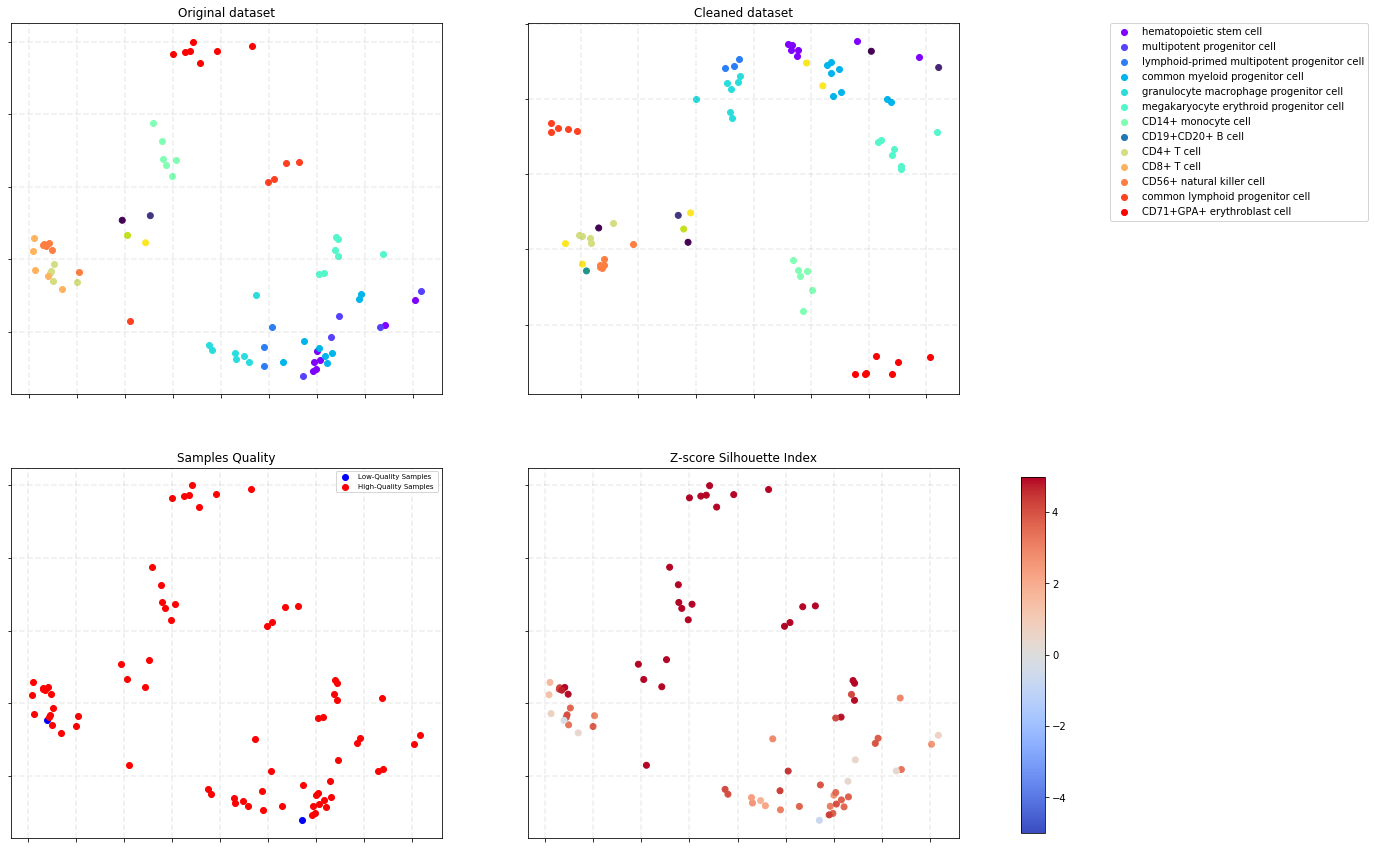

In [17]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT)
qt.display_samples_quality(Suffix='_scATACCont_Cosine_MDS',DR='MDS',names=namesCT)

In [ ]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Euclidean')
qt.display_samples_quality(Suffix='_scATACCont_RMBAD_Euclidean_MDS',DR='MDS',names=namesCT)

Computing Distance matrix

# Dataset Total: 77
# Dataset Kept: 69 (89.6 %)
# Dataset Removed: 8 (10.4 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		1.62104236822		hematopoietic stem cell
1		3		1.04776642444		multipotent progenitor cell
2		2		0.103328555749		lymphoid-primed multipotent progenitor cell
3		8		2.67518309954		common myeloid progenitor cell
4		7		2.58993950407		granulocyte macrophage progenitor cell
5		7		1.9656096663		megakaryocyte erythroid progenitor cell
6		6		2.95820306929		CD14+ monocyte cell
7		3		1.61818233712		CD19+CD20+ B cell
8		5		3.69289416078		CD4+ T cell
9		3		0.861818941123		CD8+ T cell
10		6		3.09851312634		CD56+ natural killer cell
11		5		4.23758723937		common lymphoid progenitor cell
12		7		2.94520544035		CD71+GPA+ erythroblast cell


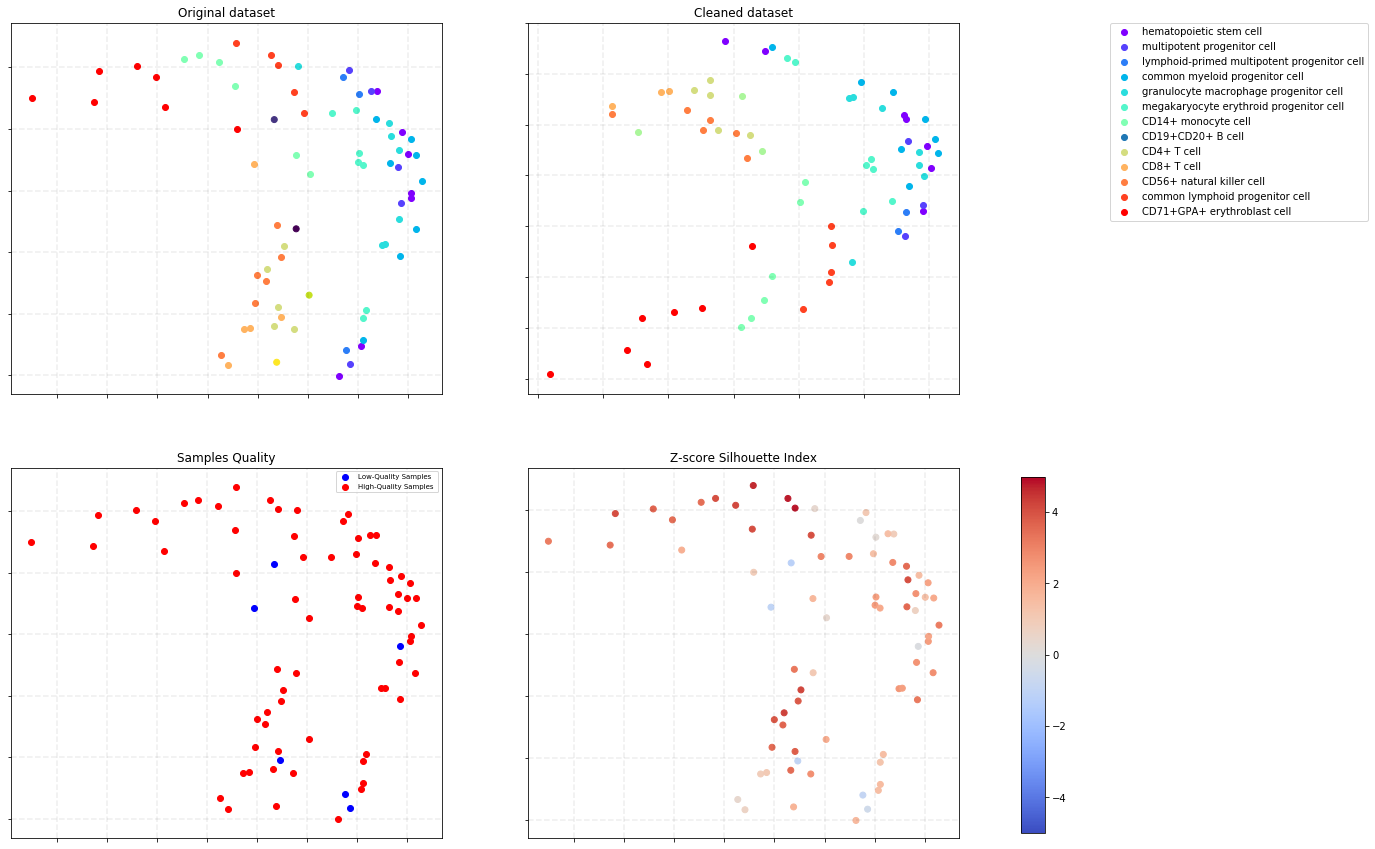

In [75]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Bray Curtis')
qt.display_samples_quality(Suffix='_scATACCont_RMBAD_Bray-Curtis_MDS',DR='MDS',names=namesCT)


# Dataset Total: 77
# Dataset Kept: 75 (97.4 %)
# Dataset Removed: 2 (2.6 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.24258059406		hematopoietic stem cell
1		5		0.690550043981		multipotent progenitor cell
2		3		2.93496149932		lymphoid-primed multipotent progenitor cell
3		8		3.32414831404		common myeloid progenitor cell
4		7		1.54685073232		granulocyte macrophage progenitor cell
5		7		3.68047245115		megakaryocyte erythroid progenitor cell
6		6		5.42078322865		CD14+ monocyte cell
7		4		5.07455938072		CD19+CD20+ B cell
8		5		2.09983809126		CD4+ T cell
9		5		1.92805090333		CD8+ T cell
10		6		2.96917842114		CD56+ natural killer cell
11		5		5.90522715587		common lymphoid progenitor cell
12		7		5.93246062865		CD71+GPA+ erythroblast cell


/users/invites/jmorlot/anaconda2/lib/python2.7/site-packages/sklearn/manifold/mds.py:407: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


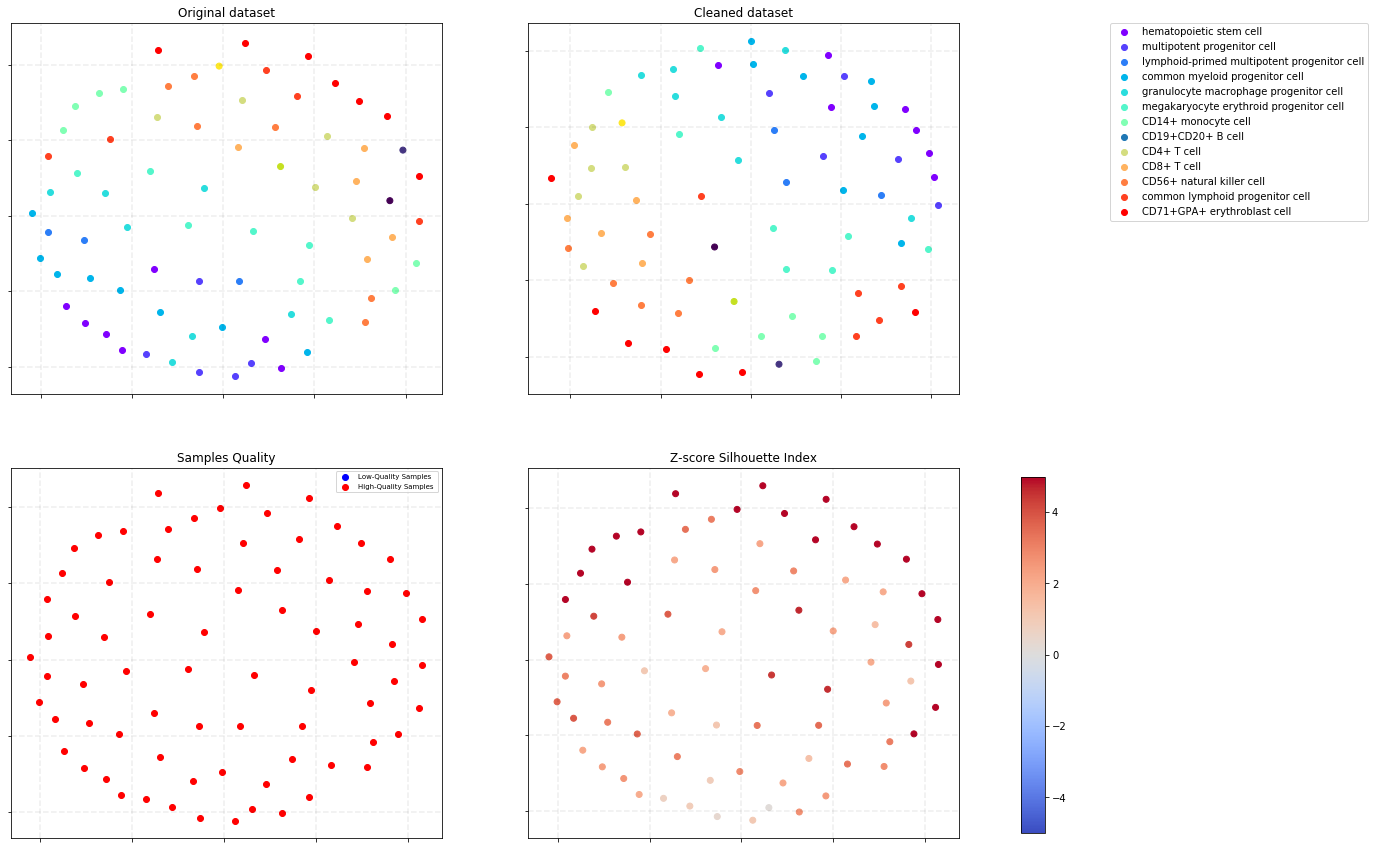

In [105]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Mutual Information')
qt.display_samples_quality(Suffix='_scATACCont_MI_MDS',DR='MDS',names=namesCT)


# Dataset Total: 77
# Dataset Kept: 46 (59.7 %)
# Dataset Removed: 31 (40.3 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
1		2		0.235358116491		multipotent progenitor cell
2		2		2.77677856832		lymphoid-primed multipotent progenitor cell
3		2		0.234019389513		common myeloid progenitor cell
4		2		1.05599382385		granulocyte macrophage progenitor cell
5		5		0.48984639762		megakaryocyte erythroid progenitor cell
6		6		2.85700766927		CD14+ monocyte cell
7		4		1.32238314295		CD19+CD20+ B cell
8		5		1.54623200622		CD4+ T cell
9		5		0.912148901361		CD8+ T cell
10		5		0.963613716689		CD56+ natural killer cell
11		5		1.89287302658		common lymphoid progenitor cell
12		3		1.035461632		CD71+GPA+ erythroblast cell

Removed Datasets
Labels		Name
0		hematopoietic stem cell


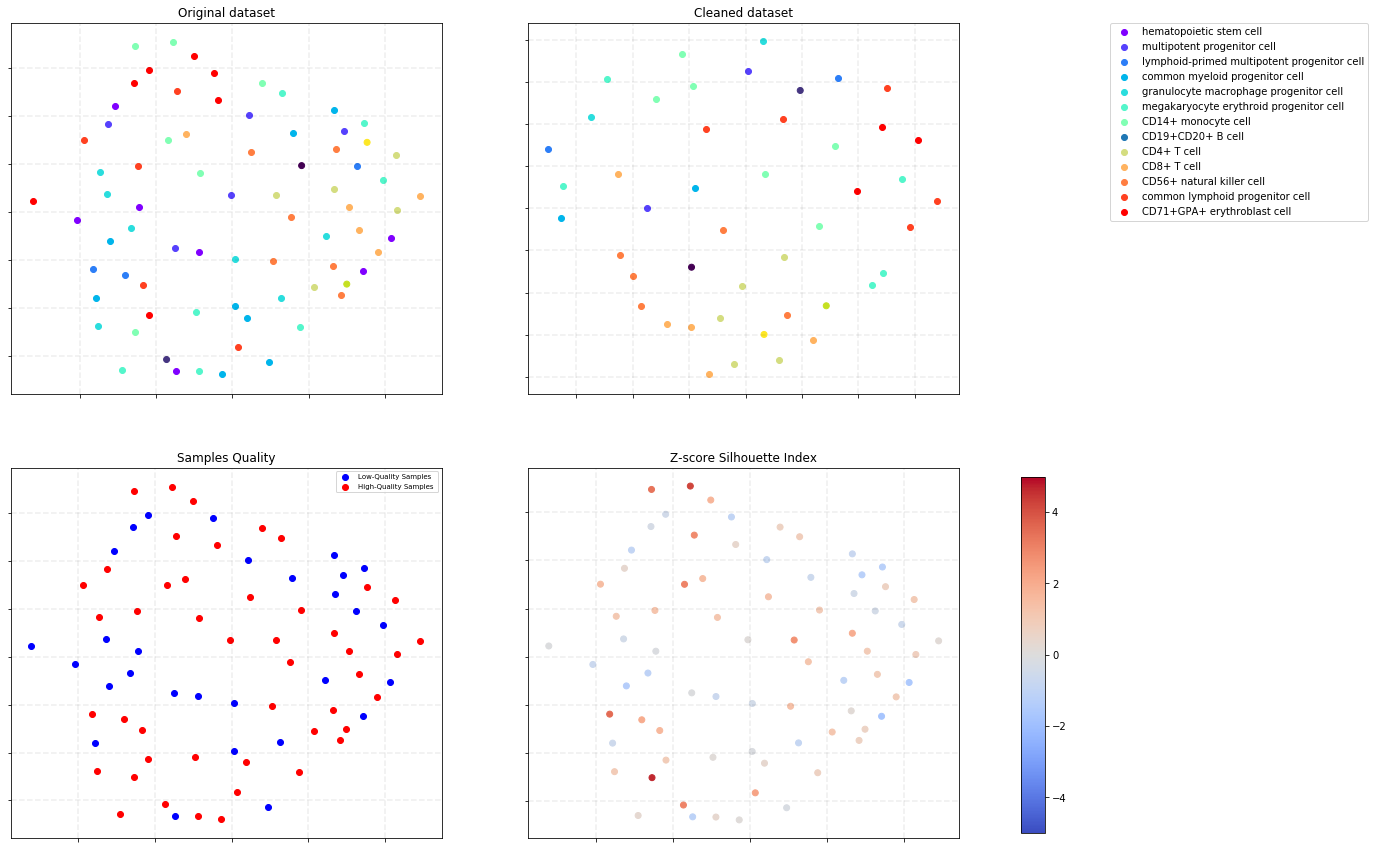

In [114]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Mutual Information',PCA='PCA')
qt.display_samples_quality(Suffix='_scATACCont_PCA-MI_MDS',DR='MDS',names=namesCT)


# Dataset Total: 77
# Dataset Kept: 67 (87.0 %)
# Dataset Removed: 10 (13.0 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		6		1.58296134376		hematopoietic stem cell
1		4		0.89059095751		multipotent progenitor cell
2		2		1.13269652518		lymphoid-primed multipotent progenitor cell
3		8		1.62879414987		common myeloid progenitor cell
4		7		1.46391160978		granulocyte macrophage progenitor cell
5		7		1.80119246397		megakaryocyte erythroid progenitor cell
6		6		3.0982327681		CD14+ monocyte cell
7		1		0.966712891992		CD19+CD20+ B cell
8		5		1.98259805532		CD4+ T cell
9		4		1.97051444927		CD8+ T cell
10		5		1.00202289397		CD56+ natural killer cell
11		5		3.13546866026		common lymphoid progenitor cell
12		7		3.09491949368		CD71+GPA+ erythroblast cell


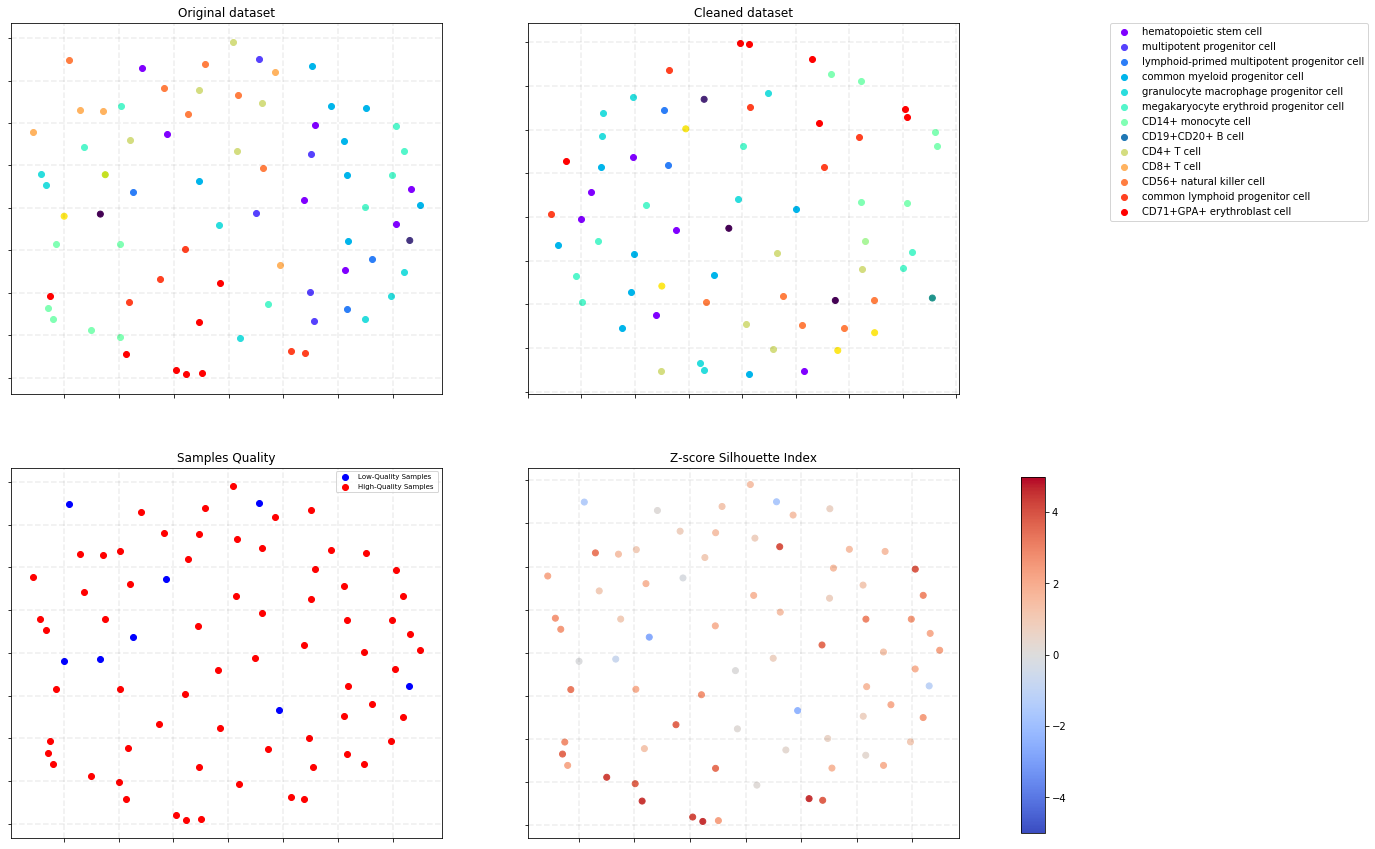

In [125]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Canberra',PCA='PCA')
qt.display_samples_quality(Suffix='_scATACCont_PCA-Canberra_MDS',DR='MDS',names=namesCT)

In [ ]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT)
qt.display_samples_quality(Suffix='_scATACCont_Cosine_TSNE',DR='TSNE',names=namesCT)

perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 77
# Dataset Kept: 61 (79.2 %)
# Dataset Removed: 16 (20.8 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		6		0.909075147205		hematopoietic stem cell
3		8		1.84827937879		common myeloid progenitor cell
4		6		2.87598965651		granulocyte macrophage progenitor cell
5		6		1.34271798182		megakaryocyte erythroid progenitor cell
6		6		1.99898647452		CD14+ monocyte cell
7		3		2.32688915818		CD19+CD20+ B cell
8		5		3.6498186157		CD4+ T cell
9		3		0.717033181641		CD8+ T cell
10		6		1.79362024854		CD56+ natural killer cell
11		5		3.75676396673		common lymphoid progenitor cell
12		7		3.33213728137		CD71+GPA+ erythroblast cell

Removed Datasets
Labels		Name
1		multipotent progenitor cell
2		lymphoid-primed multipotent progenitor cell



learning rates: 100%|██████████| 3/3 [00:55<00:00, 18.53s/it]


Optimal (learning rate,perplexity) = (1000,10)


learning rates: 100%|██████████| 3/3 [00:46<00:00, 15.54s/it]


Optimal (learning rate,perplexity) = (100,5)


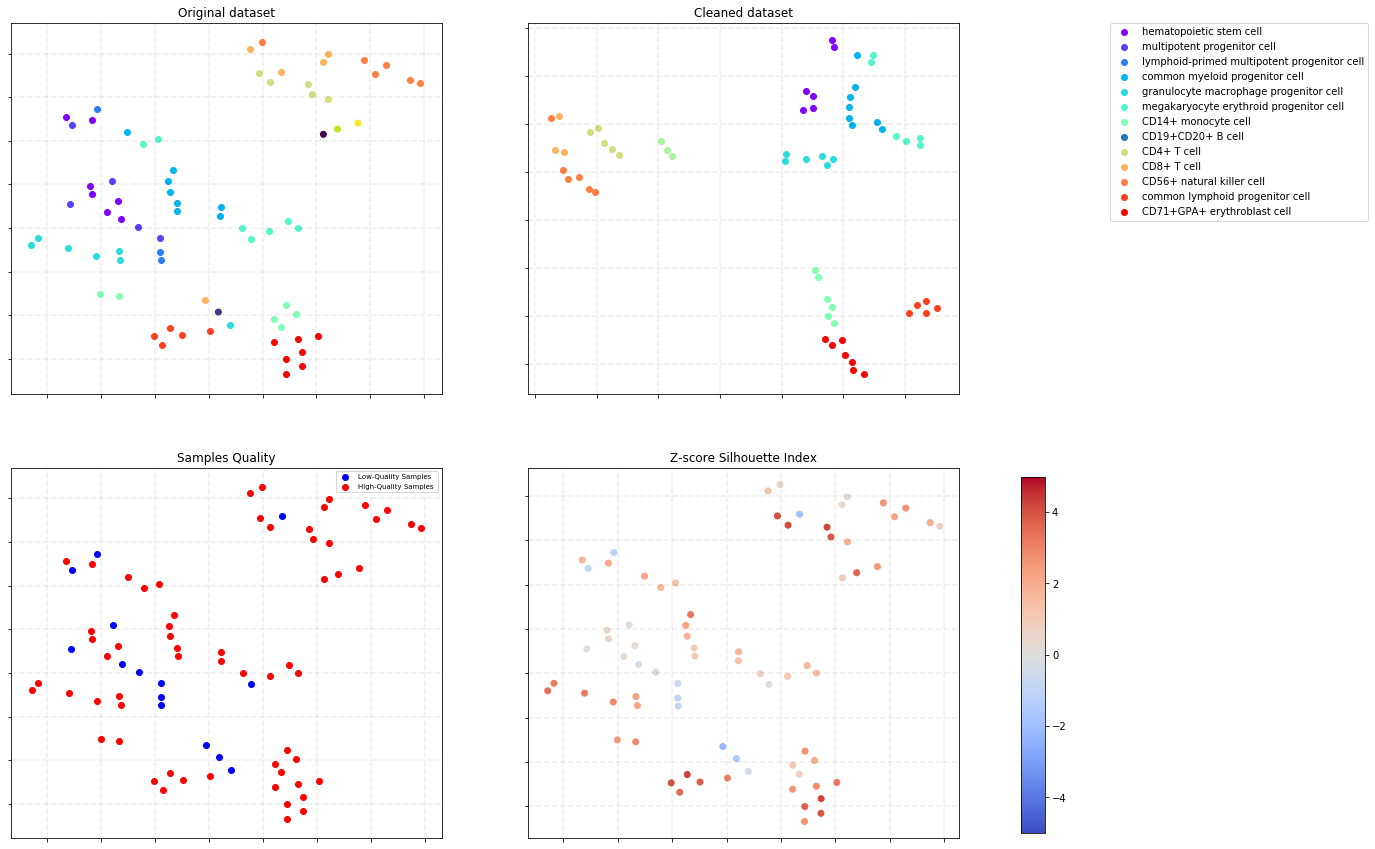

In [115]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Euclidean')
qt.display_samples_quality(Suffix='_scATACCont_Euclidean_TSNE',DR='TSNE',names=namesCT)

perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 77
# Dataset Kept: 67 (87.0 %)
# Dataset Removed: 10 (13.0 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		6		1.67529968261		hematopoietic stem cell
1		4		1.06788274606		multipotent progenitor cell
2		2		1.32901180987		lymphoid-primed multipotent progenitor cell
3		8		1.84191581067		common myeloid progenitor cell
4		7		1.67329512309		granulocyte macrophage progenitor cell
5		7		1.88241148819		megakaryocyte erythroid progenitor cell
6		6		2.96804944546		CD14+ monocyte cell
7		1		0.9100820009		CD19+CD20+ B cell
8		5		1.94934474518		CD4+ T cell
9		4		1.99645603415		CD8+ T cell
10		5		1.12565274541		CD56+ natural killer cell
11		5		3.09133644874		common lymphoid progenitor cell
12		7		2.78539063347		CD71+GPA+ erythroblast cell



learning rates: 100%|██████████| 3/3 [00:47<00:00, 15.91s/it]


Optimal (learning rate,perplexity) = (10,50)


learning rates: 100%|██████████| 3/3 [00:44<00:00, 14.73s/it]


Optimal (learning rate,perplexity) = (100,5)


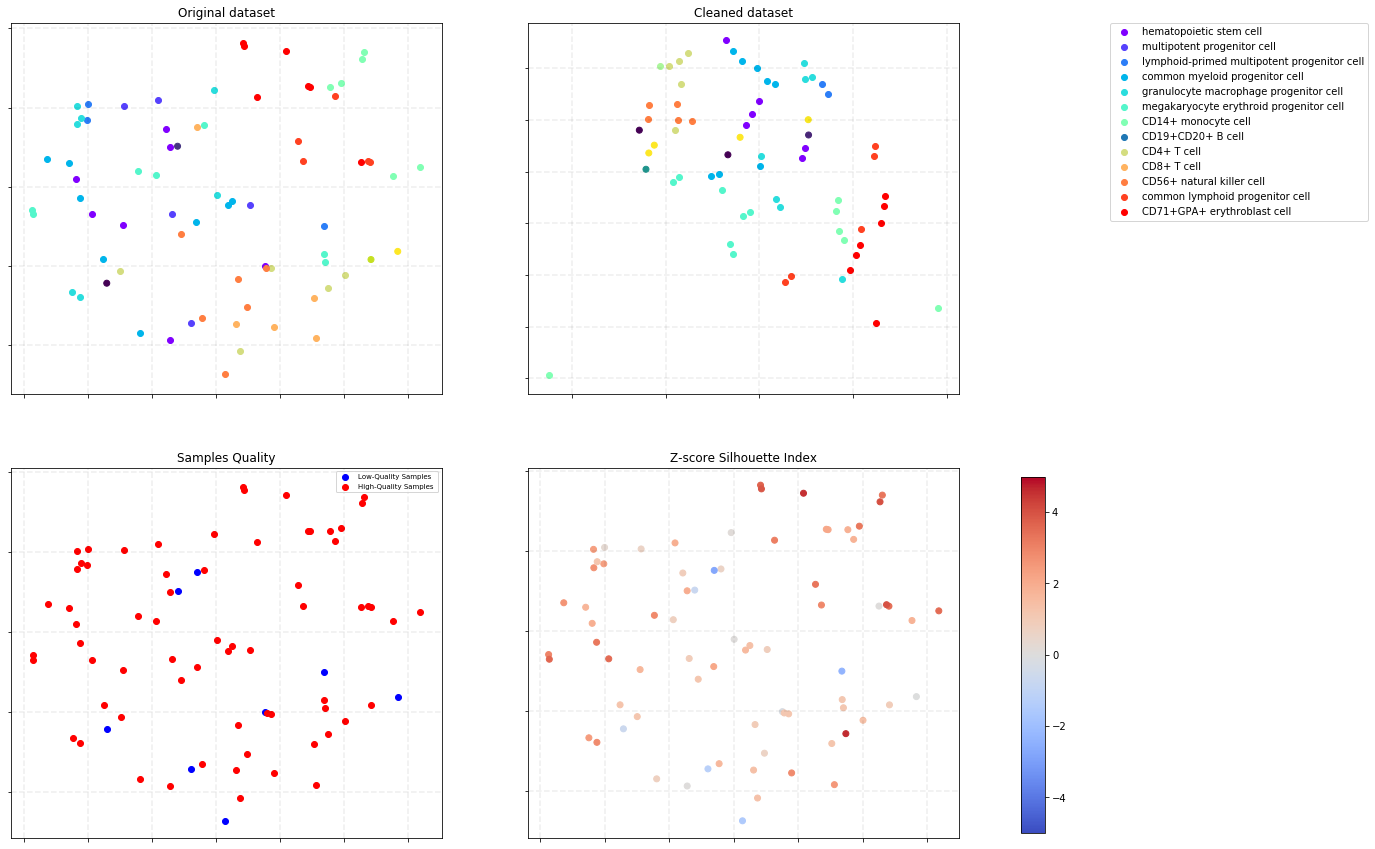

In [124]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Canberra',PCA='PCA')
qt.display_samples_quality(Suffix='_scATACCont_PCA-Canberra_TSNE',DR='TSNE',names=namesCT)

perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 77
# Dataset Kept: 75 (97.4 %)
# Dataset Removed: 2 (2.6 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.21837896272		hematopoietic stem cell
1		5		0.785926974454		multipotent progenitor cell
2		3		3.13657280325		lymphoid-primed multipotent progenitor cell
3		8		3.251420181		common myeloid progenitor cell
4		7		1.50651504431		granulocyte macrophage progenitor cell
5		7		3.48815082243		megakaryocyte erythroid progenitor cell
6		6		6.06839715525		CD14+ monocyte cell
7		4		4.7645971305		CD19+CD20+ B cell
8		5		2.50031081322		CD4+ T cell
9		5		2.10822997145		CD8+ T cell
10		6		3.1784895898		CD56+ natural killer cell
11		5		5.98833881215		common lymphoid progenitor cell
12		7		5.98786079026		CD71+GPA+ erythroblast cell



perplexities:  50%|█████     | 4/8 [00:03<00:03,  1.09it/s]/users/invites/jmorlot/anaconda2/lib/python2.7/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)

learning rates: 100%|██████████| 3/3 [00:41<00:00, 13.88s/it]


Optimal (learning rate,perplexity) = (10,50)


learning rates: 100%|██████████| 3/3 [00:41<00:00, 13.86s/it]


Optimal (learning rate,perplexity) = (10,50)


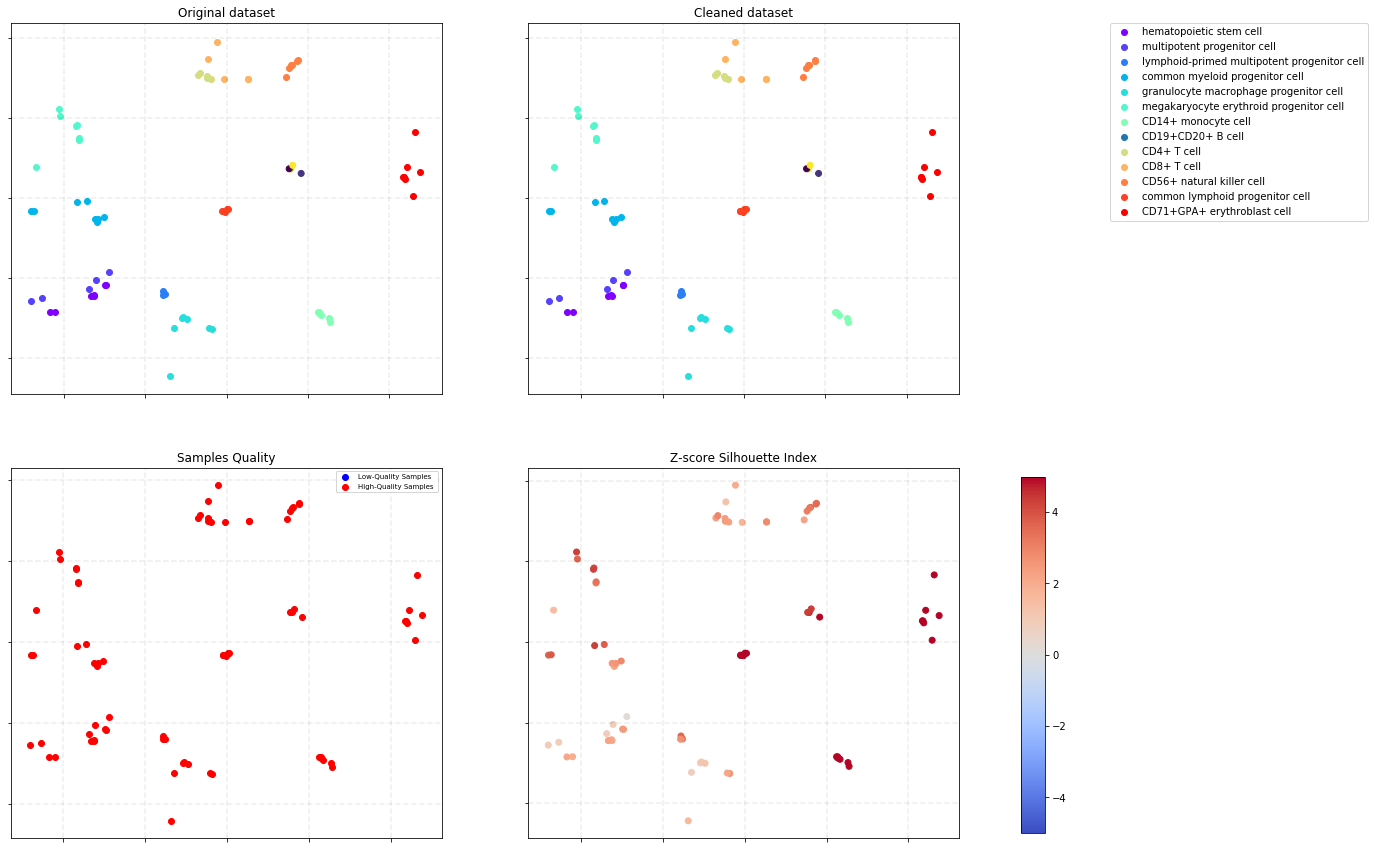

In [113]:
qt.compute_samples_quality(matrix=matrix,labels=labels,NR=100,Tz=0,return_Quality=False,names=namesCT,Distance='Mutual Information')
qt.display_samples_quality(Suffix='_scATACCont_MI_TSNE',DR='TSNE',names=namesCT)

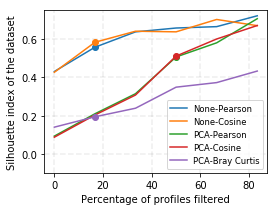

In [156]:
idx = np.argsort(qt.clust_index_filt_score['Silhouette'].values())[::-1]
keys = np.array(qt.clust_index_filt_score['Silhouette'].keys())[idx]
keys = keys[:5]

plt.figure(figsize=(4,3))
N = len(qt.clust_index_filt_evol['Silhouette'][keys[0]])
X = np.arange(N)/float(N)*100

for i,key in enumerate(keys):
    p = plt.plot(X,qt.clust_index_filt_evol['Silhouette'][key],label=key.split('-None')[0])
    
    #Display Silhouette Zscore= 1.65
    X0 = qt.clust_index_filt_threshold['Silhouette'][key]/float(len(qt.labels))*100
    idx0 = np.argmin(np.abs(X-X0))
    plt.plot(X[idx0],qt.clust_index_filt_evol['Silhouette'][key][idx0],'o',c=p[-1].get_color())

plt.ylim(ymin=-0.1)
plt.legend(fontsize='small')
plt.xlabel('Percentage of profiles filtered')
plt.ylabel('Silhouette index of the dataset')
plt.grid(color='k',linestyle='--',linewidth=0.1)
plt.savefig('Silhouette_evolution_with_Filtering_Cont.png',dpi=300, bbox_inches='tight')
plt.show()

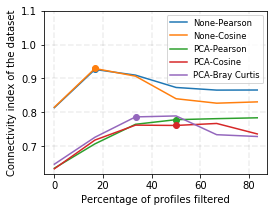

In [158]:
#idx = np.argsort(qt.clust_index_filt_score['Connectivity'].values())[::-1]
#keys = np.array(qt.clust_index_filt_score['Connectivity'].keys())[idx]

plt.figure(figsize=(4,3))
N = len(qt.clust_index_filt_evol['Connectivity'][key])
for key in keys[:5]:
    p = plt.plot(X,qt.clust_index_filt_evol['Connectivity'][key],label=key.split('-None')[0])
    
    #Display Silhouette Zscore= 1.65
    X0 = qt.clust_index_filt_threshold['Connectivity'][key]/float(len(qt.labels))*100
    idx0 = np.argmin(np.abs(X-X0))
    plt.plot(X[idx0],qt.clust_index_filt_evol['Connectivity'][key][idx0],'o',c=p[-1].get_color())
    
    
plt.ylim(ymax=1.1)
plt.legend(fontsize='small')
plt.xlabel('Percentage of profiles filtered')
plt.ylabel('Connectivity index of the dataset')
plt.grid(color='k',linestyle='--',linewidth=0.1)
plt.savefig('Connectivity_evolution_with_Filtering_Cont.png',dpi=300, bbox_inches='tight')
plt.show()

# Evolution of the distance measure on clustering indexes 

In [15]:
IdxGoodSamplesO,SilZO,OptimalDistanceO = qt.compute_samples_quality(NR=100,Tz=1.65,return_Quality=True)

Error: Need to enter a PCA-Distance-Kernel or launch all measures with compute_distances()


ValueError: 

In [33]:
import QualityMesures as QM
reload(QM)
_,CZ = QM.ZscoreConnectivityQuality(OptDistMat=qt.OptimalDistance,labels=qt.labels,NR=100,Tz=1.65)

In [142]:
reload(QT)

<module 'QualityTester' from '../QualityTester.pyc'>

In [63]:
qt.SilZ[idxS]

array([-30.20318243, -24.02159   , -22.34891912, ...,  37.68716795,
        37.76766758,  38.72301108])

In [69]:
X=[]
Y=[]
M=[]
idxS = np.argsort(qt.SilZ)
for i in tqdm(range(len(idxS)//10)):
    idx = idxS[i*10:]
    distmatC = qt.OptimalDistance[np.ix_(idx,idx)]
    labelsC = qt.labels[idx]
    labels_tmp = labelsC.copy()
    for k,l in enumerate(np.unique(qt.labels)):
        labels_tmp[labelsC==l] = k
    labelsC = labels_tmp
    
    X.append(QT.silhouette_score(distmatC,labelsC))
    Y.append(QT.Connectivity(distmatC,labelsC))
    M.append(qt.SilZ[idxS[i*10]])

 89%|████████▉ | 195/219 [00:41<00:05,  4.69it/s]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

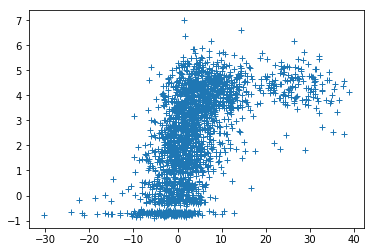

In [34]:
plt.plot(qt.SilZ,CZ,'+')
plt.show()

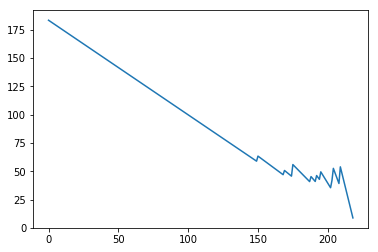

In [80]:
plt.plot(range(len(idxS)//10),M)
plt.show()

In [144]:
fT(M[i])

0.090297588757909206

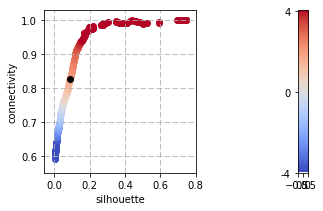

In [157]:
from matplotlib.pyplot import cm

T=1.65

def fT(k):
    if k>4:
        return 4
    elif k<-4:
        return -4
    else:
        return k
        

f,ax = plt.subplots(1,2,figsize=(6,3))
color=cm.coolwarm(np.linspace(0,1,101))
Mmin = -4
Mmax = 8
for i in range(len(X)-4):
    ax[0].scatter(X[i],Y[i],c=color[int((float(fT(M[i])-Mmin)/Mmax)*100)])
    if fT(M[i])>T and fT(M[i-1])<T:
        i0=i
        
#Set in black the position of the threshold
ax[0].scatter(X[i0],Y[i0],c='k')

ax[0].set_xlabel('silhouette')
ax[0].set_ylabel('connectivity')
ax[0].grid('k',linestyle='--')

ax[1].imshow(np.arange(100)[::-1,None],aspect=0.15,cmap='coolwarm')
ax[1].set_yticks(np.arange(0,101,50))
ax[1].set_yticklabels([4,0,-4])

plt.savefig('Clustering_index_evolution_with_SilZscore.png',dpi=300)
plt.show()

1248


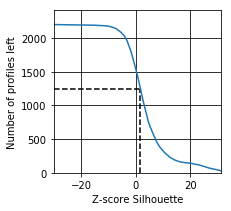

In [140]:
y0 = len(idxS)-np.arange(0,len(idxS),10)[i0]
print y0
plt.figure(figsize=(3,3))
plt.plot(M,len(idxS)-np.arange(0,len(idxS)-20,10))
plt.vlines(x=1.65,ymin=0,ymax=y0,linestyles='--')
plt.hlines(y=y0,xmin=min(M),xmax=1.65,linestyles='--')
plt.xlim([min(M),max(M)])
plt.ylim([0,len(idxS)*1.1])
plt.grid(color='k',linestyle='-')
plt.xlabel('Z-score Silhouette')
plt.ylabel('Number of profiles left')
plt.savefig('Number_of_profiles_with_SilZscore.png',dpi=300)
plt.show()

In [28]:
SilTruncEvol,SilScore = qt.qualitysilhouettescore()

Computing Distance matrix

# Dataset Total: 77
# Dataset Kept: 60 (77.9 %)
# Dataset Removed: 17 (22.1 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.11113716501		Cluster 0
1		1		0.745738924617		Cluster 1
3		8		1.81090885161		Cluster 3
4		6		2.44201687836		Cluster 4
5		6		1.08052046463		Cluster 5
6		5		2.31339149686		Cluster 6
7		3		3.23588465824		Cluster 7
8		5		3.68969719916		Cluster 8
9		1		0.0238635815393		Cluster 9
10		6		4.35596912069		Cluster 10
11		5		4.29357001235		Cluster 11
12		7		4.14916752258		Cluster 12

Removed Datasets
Labels		Name
2		Cluster 2
Computing Distance matrix

# Dataset Total: 77
# Dataset Kept: 59 (76.6 %)
# Dataset Removed: 18 (23.4 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.1293578747		Cluster 0
1		1		0.829516074581		Cluster 1
3		8		1.69991719329		Cluster 3
4		6		2.26687487198		Cluster 4
5		6		1.186040584		Cluster 5
6		5		2.48180565556		Cluster 6
7		3		3.14865143376		Cluster 7
8		5		3.81707976668		Cluster


# Dataset Total: 77
# Dataset Kept: 61 (79.2 %)
# Dataset Removed: 16 (20.8 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		5		1.06318928799		Cluster 0
1		1		0.0345088218313		Cluster 1
3		8		1.82248245285		Cluster 3
4		6		2.9660317852		Cluster 4
5		6		1.41427057187		Cluster 5
6		6		2.1729858537		Cluster 6
7		3		2.34531229288		Cluster 7
8		5		4.05174107967		Cluster 8
9		3		0.570549745859		Cluster 9
10		6		2.19213475353		Cluster 10
11		5		3.67816903783		Cluster 11
12		7		3.27151262537		Cluster 12

Removed Datasets
Labels		Name
2		Cluster 2
Computing Distance matrix

# Dataset Total: 77
# Dataset Kept: 73 (94.8 %)
# Dataset Removed: 4 (5.2 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		7		2.7816850217		Cluster 0
1		4		0.698272457336		Cluster 1
2		3		4.04090933918		Cluster 2
3		8		3.37831602659		Cluster 3
4		7		3.06816095995		Cluster 4
5		7		4.20944423651		Cluster 5
6		6		6.04982863962		Cluster 6
7		4		6.65742531777		Cluster 7
8		5		3.86633702691		Clus

In [29]:
idx = np.argsort(SilScore.values())[::-1]
keys = np.array(SilScore.keys())[idx]

for key in keys:
    print key,SilScore[key]

None-Pearson-None 0.803323031121
None-Cosine-None 0.796519397544
None-Spearman-None 0.609377944091
PCA-Bray Curtis-None 0.608763683562
None-Bray Curtis-None 0.593356665379
PCA-City Block-None 0.576222254199
PCA-Cosine-None 0.573426876119
PCA-Pearson-None 0.56661761661
PCA-Spearman-None 0.551612899826
None-Chebyshev-None 0.540512645788
None-Euclidean-None 0.53777613614
PCA-L2-None 0.537112164765
None-Canberra-None 0.535652389793
None-L2-None 0.534957293557
PCA-Euclidean-None 0.532082267521
None-City Block-None 0.522468583017
PCA-Canberra-None 0.519178715649
None-Hamming-None 0.501612810432
PCA-Chebyshev-None 0.47990120506


# Visualization

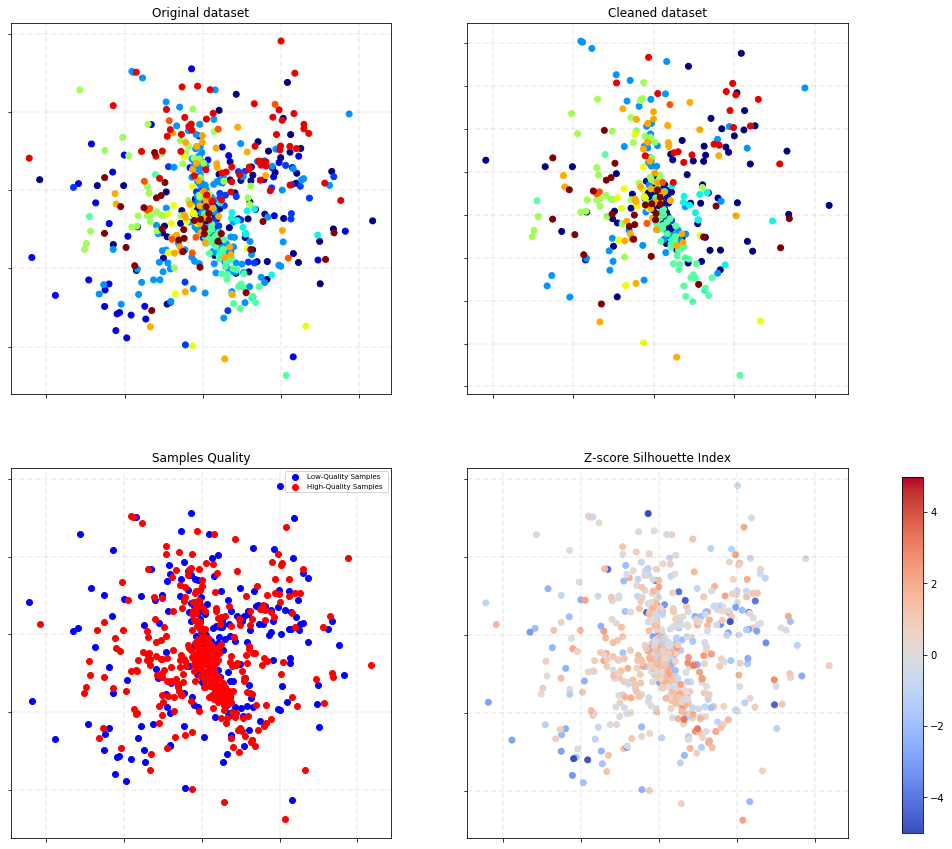

In [104]:
#Reduction Dimension
from sklearn import manifold
from matplotlib.pyplot import cm 

model_tsne = manifold.TSNE(n_components=2, random_state=3,perplexity=500, 
     early_exaggeration=4.0, learning_rate=10, 
     n_iter=100000, metric='precomputed')
# model_tsne = manifold.TSNE(n_components=2, metric='precomputed')
#model_MDS = manifold.MDS(n_components=2, dissimilarity='precomputed')

XY = model_tsne.fit_transform(qt.OptDistMat)

labelsGood = np.zeros(len(labels))
labelsGood[qt.IdxGoodSamples] = 1

f,ax = plt.subplots(2,2,figsize=(15,15))
ax[0,0].scatter(XY[:,0],XY[:,1],c=qt.labels,cmap='jet')
ax[0,0].set_title('Original dataset')
ax[0,0].grid(color='k',linestyle='--',linewidth=0.1)
ax[0,0].set_xticklabels([])
ax[0,0].set_yticklabels([])

ax[0,1].scatter(XY[qt.IdxGoodSamples,0],XY[qt.IdxGoodSamples,1],c=labels[qt.IdxGoodSamples],cmap='jet')
ax[0,1].set_title('Cleaned dataset')
ax[0,1].grid(color='k',linestyle='--',linewidth=0.1)
ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])

color=cm.bwr(np.linspace(0,1,2))
for i in range(2):
    ax[1,0].scatter(XY[labelsGood==i,0],XY[labelsGood==i,1],c=color[i])

ax[1,0].grid(color='k',linestyle='--',linewidth=0.1)
ax[1,0].legend(['Low-Quality Samples','High-Quality Samples '],loc=0,fontsize='x-small')
ax[1,0].set_title('Samples Quality')
ax[1,0].set_xticklabels([])
ax[1,0].set_yticklabels([])

cax = ax[1,1].scatter(XY[:,0],XY[:,1],c=qt.SilZ, vmin=-5, vmax=5,cmap='coolwarm')
ax[1,1].grid(color='k',linestyle='--',linewidth=0.1)
ax[1,1].set_title('Z-score Silhouette Index')
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

colorbar_ax = f.add_axes([0.95, 0.13, 0.02, 0.33])
f.colorbar(cax, cax=colorbar_ax)

plt.savefig('TSNE-SamplesQuality_scATAC.png',dpi=300,format='png')
plt.show()

# Testing PCA to find optimal genomic sites

In [106]:
sys.path.append('../')
import RandomNGS as RNGS

from tqdm import tqdm 
from sklearn.decomposition import PCA

In [107]:
reload(RNGS)

<module 'RandomNGS' from '../RandomNGS.py'>

In [111]:
M,N = matrix.shape
pca = PCA(n_components=M-1)
pca.fit(matrix)


PCA(copy=True, iterated_power='auto', n_components=541, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [112]:
SV = pca.singular_values_

In [113]:
#Random matrix
pcaR = PCA(n_components=pca.n_components)
NR = 10
SVR = np.zeros((NR,pcaR.n_components))
for nr in tqdm(range(NR)):
    matrixR = RNGS.RandomNGS(matrix,binary=True,seed=nr)
    pcaR.fit(matrixR)
    SVR[nr,:] = pcaR.singular_values_



  0%|          | 0/10 [00:00<?, ?it/s]
Exception in thread Thread-8:
Traceback (most recent call last):
  File "/users/invites/jmorlot/anaconda2/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/users/invites/jmorlot/anaconda2/lib/python2.7/site-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/users/invites/jmorlot/anaconda2/lib/python2.7/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



Remaining Index to pick = 949744.0
Remaining Index to pick = 9437.0




 10%|█         | 1/10 [01:13<11:03, 73.72s/it]

Remaining Index to pick = 950095.0
Remaining Index to pick = 9466.0
Remaining Index to pick = 3.0




 20%|██        | 2/10 [02:37<10:31, 78.97s/it]

Remaining Index to pick = 950230.0
Remaining Index to pick = 9318.0




 30%|███       | 3/10 [03:51<09:00, 77.27s/it]

Remaining Index to pick = 948509.0
Remaining Index to pick = 9316.0




 40%|████      | 4/10 [05:05<07:38, 76.42s/it]

Remaining Index to pick = 948229.0
Remaining Index to pick = 9514.0




 50%|█████     | 5/10 [06:19<06:19, 75.91s/it]

Remaining Index to pick = 947966.0
Remaining Index to pick = 9465.0




 60%|██████    | 6/10 [07:33<05:02, 75.55s/it]

Remaining Index to pick = 949156.0
Remaining Index to pick = 9326.0




 70%|███████   | 7/10 [08:48<03:46, 75.44s/it]

Remaining Index to pick = 949533.0
Remaining Index to pick = 9432.0
Remaining Index to pick = 2.0




 80%|████████  | 8/10 [10:13<02:33, 76.66s/it]

Remaining Index to pick = 948784.0
Remaining Index to pick = 9409.0




 90%|█████████ | 9/10 [11:27<01:16, 76.43s/it]

Remaining Index to pick = 950355.0
Remaining Index to pick = 9420.0




100%|██████████| 10/10 [12:42<00:00, 76.26s/it]



In [54]:
pca.components_.shape

(2, 488736)

In [115]:
plt.hist(SV)
plt.hist(SVR)
plt.show()

/users/invites/jmorlot/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 10 x 541)
  '(shape is %d x %d)' % inp.shape[::-1])


KeyboardInterrupt: 

In [119]:
m = SVR.mean(axis=0)
s = SVR.std(axis=0)
S = SV.copy()
S[s==0]=0
s[s==0]=1
NCompOpt = np.max(np.where((S-m)/s>2.32)[0])

In [120]:
pca = PCA(n_components=NCompOpt)
matrixPCA = pca.fit_transform(matrix)

# Comparing with PCA Reduction

In [ ]:
reload(QT)
qtPCA = QT.QualityTester(Binary=True,displaytop=10,PCARed=True)

In [ ]:
qtPCA.compute_distances(matrix,labels,GetDR=False)

In [ ]:
from adjustText import adjust_text
fig, ax = plt.subplots(1,1,figsize=(5,5))
IkeyX = 'Silhouette'
IkeyY = 'Connectivity'

keys=[]
keysPCA=[]
for Ikey in [IkeyX,IkeyY]:
    values = np.array(qt.Res[Ikey].values())
    keysI = np.array(qt.Res[Ikey].keys())
    idx = np.argsort(values)
    idx = idx[~np.isnan(values[idx])]

    if Ikey=='Connectivity': idx = idx[::-1]

    idx = idx[-6:]
    keys = keys + list(keysI[idx])
    
    #PCA
    values = np.array(qtPCA.Res[Ikey].values())
    keysI = np.array(qtPCA.Res[Ikey].keys())
    idx = np.argsort(values)
    idx = idx[~np.isnan(values[idx])]

    if Ikey=='Connectivity': idx = idx[::-1]

    idx = idx[-6:]
    keysPCA = keysPCA + list(keysI[idx])
    
    

keys = list(set(keys))
keysPCA = list(set(keysPCA))

X = np.array([qt.Res[IkeyX][key] for key in keys]) 
XPCA = np.array([qtPCA.Res[IkeyX][key] for key in keysPCA])

Y = np.array([qt.Res[IkeyY][key] for key in keys])
YPCA = np.array([qtPCA.Res[IkeyY][key] for key in keysPCA])

ax.plot(X,Y,'ob')
ax.plot(XPCA,YPCA,'or')

texts = [ax.text(qt.Res[IkeyX][key], qt.Res[IkeyY][key], key.replace(' / ','\n')) for key in keys] + \
        [ax.text(qtPCA.Res[IkeyX][key], qtPCA.Res[IkeyY][key], key.replace(' / ','\n')) for key in keysPCA]

    
# xmin = min([X.min(),XPCA.min()])
# xmax = max([X.max(),XPCA.max()])
# ymin = min([Y.min(),YPCA.min()])
# ymax = max([Y.max(),YPCA.max()])

# xmin = xmin*1.4
# xmax = xmax*1.4
# ymin = ymin*1.4
# ymax = ymax*1.4

# ax.set_xlim([xmin,xmax])
# ax.set_ylim([ymin,ymax])
    
adjust_text(texts)

ax.grid(color='k',linestyle='--',linewidth=0.1)
ax.set_xlabel(IkeyX)
ax.set_ylabel(IkeyY)

plt.savefig('NamesScatter_scell_withPCARed.png',dpi=300,format='png')

plt.show()

In [233]:
values = np.array(qtPCA.Res['Silhouette'].values())
keys = np.array(qtPCA.Res['Silhouette'].keys())
idx = np.argsort(values)[::-1]
for k,v in zip(keys[idx],values[idx]):
    print k,v

Spearman / ExpKernel 0.0566900846652
Spearman / None 0.0555179522158
braycurtis / ExpKernel 0.0389649722636
braycurtis / None 0.0380474975261
cosine / ExpKernel 0.0328915665996
cosine / None 0.0318756545068
correlation / ExpKernel 0.0314446894129
correlation / None 0.0304435138352
MIC / ExpKernel 0.0200322490168
MIC / None 0.0194210632247
canberra / None 0.0181110416817
seuclidean / ExpKernel 0.00274829820394
chebyshev / ExpKernel 5.52454207842e-12
canberra / ExpKernel 0.0
None / ExpKernel 0.0
euclidean / ExpKernel 0.0
l2 / ExpKernel 0.0
cityblock / ExpKernel 0.0
hamming / None 0.0
hamming / ExpKernel -1.04117767932e-15
None / CosKernel -0.0220828440358
hamming / CosKernel -0.0221401506558
braycurtis / CosKernel -0.0221569840452
Spearman / CosKernel -0.0221626512138
canberra / CosKernel -0.0221628559194
MIC / CosKernel -0.0221754429782
correlation / CosKernel -0.022190207611
cosine / CosKernel -0.0221911069306
cityblock / SigKernel -0.0221913726589
canberra / SigKernel -0.0223114103991